# Create ROC-plots with all traits per clf

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [37]:
o = np.load('/home/sophia/ma_py/Big5-NLP/results/b5_wordlists_df_log_binary_anova_PCAFalse_10_openness_meantprs.npy')
c = np.load('/home/sophia/ma_py/Big5-NLP/results/b5_wordlists_df_log_binary_anova_PCAFalse_10_conscientiousness_meantprs.npy')
e = np.load('/home/sophia/ma_py/Big5-NLP/results/b5_wordlists_df_log_binary_anova_PCAFalse_10_extraversion_meantprs.npy')
a = np.load('/home/sophia/ma_py/Big5-NLP/results/b5_wordlists_df_log_binary_anova_PCAFalse_10_agreeableness_meantprs.npy')
n = np.load('/home/sophia/ma_py/Big5-NLP/results/b5_wordlists_df_log_binary_anova_PCAFalse_10_neuroticism_meantprs.npy')

In [38]:
o

array([0.        , 0.01109861, 0.02219723, 0.03170854, 0.04281965,
       0.05548056, 0.06815398, 0.0808399 , 0.09671291, 0.10306212,
       0.11258593, 0.11733533, 0.12524684, 0.14428196, 0.16331709,
       0.1759655 , 0.18231471, 0.19338833, 0.20128734, 0.20762405,
       0.21396075, 0.21713536, 0.22348456, 0.23455818, 0.2488314 ,
       0.25991751, 0.26784152, 0.28368954, 0.29636295, 0.30269966,
       0.32012248, 0.34228221, 0.35178103, 0.35336833, 0.35809274,
       0.37235346, 0.38346457, 0.39611299, 0.4056368 , 0.41829771,
       0.43095863, 0.44046994, 0.46110486, 0.46745407, 0.48015248,
       0.49126359, 0.4944382 , 0.5023622 , 0.51188601, 0.52457193,
       0.54043245, 0.55630546, 0.56577928, 0.587989  , 0.59748781,
       0.60698663, 0.61966004, 0.63232096, 0.63867017, 0.64501937,
       0.65295588, 0.66405449, 0.67512811, 0.68621422, 0.68937633,
       0.69253843, 0.70997375, 0.72103487, 0.72738408, 0.74324459,
       0.76227972, 0.77179103, 0.78607674, 0.79560055, 0.80193

In [35]:
ocean = np.stack([o,c,e,a,n])
x = np.mean(ocean, axis=0)

<ipython-input-34-d771ae4b2d0c>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal', 'datalim')


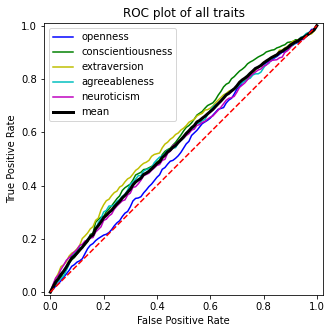

In [34]:
p = Path('/home/sophia/ma_py/Big5-NLP/results/')
outputname = 'b5_wordlists_df_log_binary_anova_PCAFalse_10'
mean_fpr = np.linspace(0, 1, 101)
plt.figure(figsize=(5, 5))
plt.plot(mean_fpr, o, 'b', label='openness')
plt.plot(mean_fpr, c, 'g', label='conscientiousness')
plt.plot(mean_fpr, e, 'y', label='extraversion')
plt.plot(mean_fpr, a, 'c', label='agreeableness')
plt.plot(mean_fpr, n, 'm', label='neuroticism')
plt.plot(mean_fpr, x, 'k', label='mean', linewidth=3)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.title('ROC plot of all traits')
plt.axes().set_aspect('equal', 'datalim')
plt.savefig(Path(p, outputname + "_" + 'alltraits_roc_plot.png'))
plt.show()